<b> We import the <i>h5py</i> python library (https://www.h5py.org/) to work with hdf5 format, and <i>matplotlib</i> for visualizations  </b>

In [12]:
import h5py
import matplotlib.pyplot as plt

<b>Read the hdf5 file:</b>

In [3]:
lenDB = h5py.File('LEN-DB.hdf5', 'r')

<b> Print the group names in the file </b> 

In [4]:
for key in lenDB.keys():
    print(key)

AN
EQ
Stations


<b> Let's explore the items in the groups </b>

In [6]:
earthquakes = list(lenDB['EQ'].keys())
print('Number of earthquakes: ', len(earthquakes))
print('Examples of earthquake keys: ', earthquakes[:5])

Number of earthquakes:  629095
Examples of keys:  ['AE_319A_1354213304.0999', 'AE_319A_1355252254.425', 'AE_319A_1360263749.5500002', 'AE_319A_1362597107.2', 'AE_319A_1363632861.6499999']


In [9]:
noise = list(lenDB['AN'].keys())
print('Number of noise waveforms: ', len(noise))
print('Examples of noise keys: ', noise[:5])

Number of noise waveforms:  615847
Examples of noise keys:  ['AE_113A_1334887512.5249999', 'AE_113A_1336639948.775', 'AE_113A_1337258057.2749', 'AE_113A_1337763598.2', 'AE_113A_1338669957.3500001']


In [8]:
stations = list(lenDB['Stations'].keys())
print('Number of stations: ', len(stations))
print('Examples of station keys: ', stations[:5])

Number of stations:  1487
Examples of station keys:  ['AE_113A', 'AE_319A', 'AE_BABIT', 'AE_BARN', 'AE_DUN6']


<b> Let's have a closer look at one earthquake example </b>

In [14]:
eq = lenDB['EQ'][earthquakes[1000]]
eq

<HDF5 dataset "AF_WDLM_1413563823.095": shape (3, 540), type "<f8">

The data are stored as numpy arrays which we can easily access

In [34]:
eq[:]

array([[ 4.11026025e-08,  3.55794129e-08,  4.40558838e-08, ...,
        -1.71562474e-08, -2.32049554e-08, -1.86115980e-08],
       [ 5.48436700e-08,  5.41363454e-08,  6.41454370e-08, ...,
         7.06002756e-09,  5.42397576e-09, -1.33853943e-10],
       [ 4.61198851e-09,  8.69128712e-09,  1.36486002e-08, ...,
        -1.20131930e-08, -1.19486422e-08, -1.69616783e-08]])

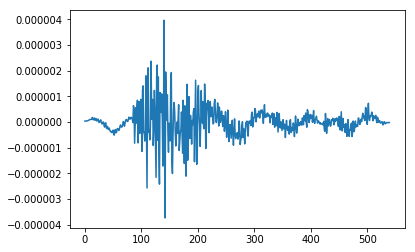

In [15]:
plt.plot(eq[0,:])

Every waveform has attributes that are accessible through the <i>h5py</i> object <i>attrs</i>

In [16]:
list(eq.attrs.keys()) 

['net',
 'sta',
 'stla',
 'stlo',
 'stel',
 'starttime',
 'endtime',
 'mag',
 'evla',
 'evlo',
 'evdp',
 'otime',
 'dist',
 'az',
 'baz']

In [22]:
print('Magnitude: ', eq.attrs['mag'])
print('Station:', eq.attrs['sta'])

Magnitude:  1.5
Station: WDLM


<b>The noise group</b> has the same type of data as earthquake group, but smaller number of attributes available

In [24]:
lenDB['AN'][noise[1000]]

<HDF5 dataset "AF_CVNA_1263443432.6950002": shape (3, 540), type "<f8">

In [25]:
list(lenDB['AN'][noise[1000]].attrs.keys()) 

['net', 'sta', 'stla', 'stlo', 'stel', 'starttime', 'endtime']

<b> Let's explore the station group </b>

In [27]:
station = lenDB['Stations'][stations[1000]]
station

<HDF5 dataset "IU_KIP": shape (1,), type "<i8">

In [30]:
station[:]

array([0])

In [29]:
list(station.attrs.keys())

['net', 'sta', 'stla', 'stlo', 'stel']

<b> We can easily filter the data by attributes </b> <br/>
Let's try to get earthquakes bigger than magnitude 7 in the database.

In [35]:
bigEarthquakes = [eq for eq in earthquakes if lenDB['EQ'][eq].attrs['mag'] > 7]
bigEarthquakes

['AK_CAPN_1543598980.5484002',
 'AK_CUT_1543598983.94',
 'AK_GHO_1543598978.2884',
 'AK_KNK_1543598979.2484',
 'AK_PWL_1543598981.9683998',
 'AK_RC01_1543598973.94',
 'AK_SAW_1543598981.6483998',
 'AK_SKN_1543598982.7484002',
 'AK_SLK_1543598980.8883998',
 'AK_SSN_1543598975.1683998']

<b> Remember to close the hdf5 file </b>

In [37]:
lenDB.close()
